## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# View data
#study_results.head()
#mouse_metadata.head()

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mouse_count =combined_df["Mouse ID"].count()
mouse_count

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_rows


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = clean_df["Mouse ID"].count()
mouse_count

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 


ss_mean = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
ss_median = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
ss_variance = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
ss_standard_deviation = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
ss_sem = combined_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.
ss_summary_df = pd.DataFrame({"Mean": ss_mean, "Median": ss_median, "Variance": ss_variance, "Standad Deviation": ss_standard_deviation, "SEM": ss_sem})
ss_summary_df




,Mean,Median,Variance,Standad Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

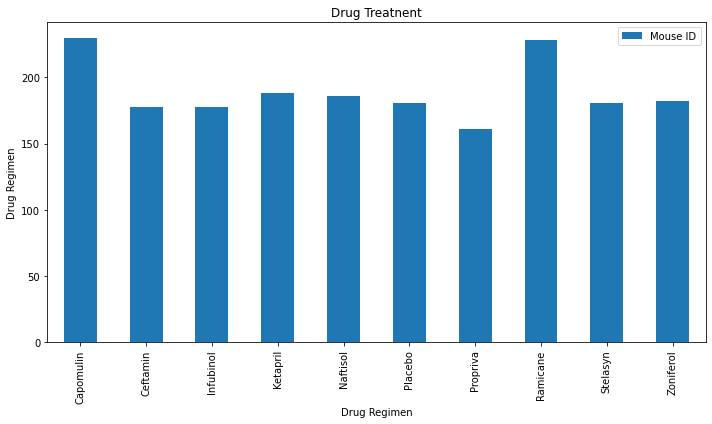

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drug_regimen_df = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()
drug_regimen_df

# Only want to use 1st 2 coloumns 
regimen_df = drug_regimen_df[["Drug Regimen", "Mouse ID"]]
regimen_df = regimen_df.set_index("Drug Regimen")

# Start bar chat
regimen_df.plot(kind="bar", figsize=(10,6))
plt.title("Drug Treatnent")
plt.ylabel ("Drug Regimen")
plt.tight_layout()

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_names = ss_summary_df.index.tolist()
drug_names


['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

In [11]:
# Turn Drug count into a list
drug_count = (combined_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count

[230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

In [12]:
# Set x axis
x_axis = np.arange(len(drug_count))


Text(0, 0.5, 'Trial Count')

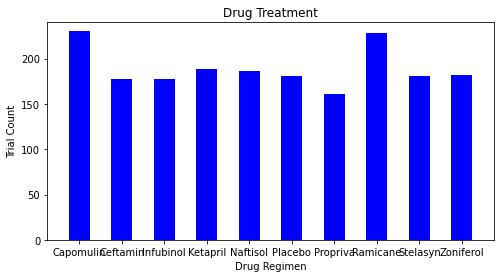

In [13]:

x_axis = drug_names
#tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,4))
plt.bar(x_axis, drug_count, color="b", width=.5)
#plt.xticks(tick_locations, drug_names.index.values, rotation="vertical")

# x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(drug_count)+10)

# Set title and labels
plt.title("Drug Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Trial Count")

In [14]:
plt.clf()
plt.cla()
plt.close()

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Create a gender data frame
gender = pd.DataFrame(combined_df.groupby(["Sex"]).count()).reset_index()
gender.head()

# Consolidate to two rows
gender_df = gender[["Sex", "Mouse ID"]]
gender_df.head()

,Sex,Mouse ID
0,Female,935
1,Male,958


Text(0, 0.5, '')

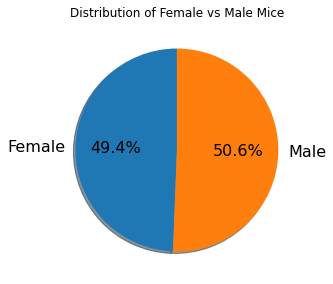

In [16]:
# Pie Chart
plt.figure(figsize=(10,5))

ax1 = plt.subplot(121, aspect="equal")
gender_df.plot(kind="pie", y = "Mouse ID", ax=ax1, autopct='%.1f%%',
              startangle=90, shadow=True, labels=gender_df["Sex"], legend = False, fontsize = 16)

plt.title("Distribution of Female vs Male Mice")
plt.ylabel("")

(-1.1576632884343911,
 1.105212624864745,
 -1.1046090826010622,
 1.1012191231463642)

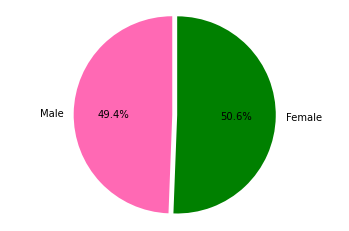

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_gender = (combined_df.groupby(["Sex"])["Mouse ID"].count()).tolist()
mice_gender

# Add this to pie chart
my_labels = ["Male", "Female"]
my_colors = ["hotpink", "green"]
explode = (.05, 0)

# Build the Pie Chart
plt.pie(mice_gender, explode=explode, my_labels=my_labels, my_colors=my_colors, autopct="%.1f%%", shadow=False, startangle=90)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
combined_df.head()

capomulin_df = combined_df.loc[combined_df["Drug Regimen"]=="Campomulin",:]
ramicane_df = combined_df.loc[combined_df["Drug Regimen"]=="Ramicane",:]
infubinol_df = combined_df.loc[combined_df["Drug Regimen"]=="Infubinol",:]
ceftamin_df = combined_df.loc[combined_df["Drug Regimen"]=="Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
ramicane_max = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_vol = pd.DataFrame(ramicane_max)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
ramicane_merge = pd.merge(ramicane_vol, combined_df, on=("Mouse ID", "Timepoint"), how="left")
ramicane_merge.head()



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [45]:
tumor_vol_ramicane = ramicane_merge["Tumor Volume (mm3)"]
#tumor_vol_ramicane

quartiles = tumor_ramicane.quantile([.25,.5,.75])
lowerquartiles = quartiles[.25]
upperquartiles = quartiles[.75]
iqr = upperquartiles-lowerquartiles

print(f"Tumor Volume Ramicane regimen:")
print(f"The upper quartile of tumor volume is: {upperquartiles}.")
print(f"The lower quartile of tumor volume is: {lowerquartiles}.")
print(f"The interquartile range of tumor volme is: {iqr}.")
print(f"The median of tumor volume is: {quartiles[0.5]}.")

lower_bound = lowerquartiles - (1.5*iqr)
upper_bound = upperquartiles + (1.5*iqr)
print(f"Values above {upper_bound} could be outliers.")
print(f"Values below {lower_bound} could be outliers.")



Tumor Volume Ramicane regimen:
The upper quartile of tumor volume is: 40.65900627.
The lower quartile of tumor volume is: 31.56046955.
The interquartile range of tumor volme is: 9.098536719999998.
The median of tumor volume is: 36.56165229.
Values above 54.30681135 could be outliers.
Values below 17.912664470000003 could be outliers.


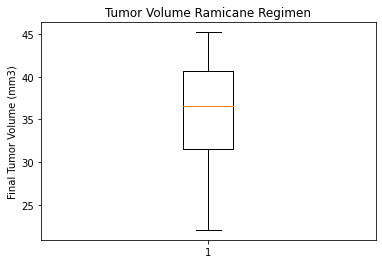

In [46]:
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume Ramicane Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(tumor_ramicane)
plt.show()

In [53]:
#Infubinol

infubinol_max = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_vol = pd.DataFrame(infubinol_max)

# Marge into new DataFrame
infubinol_merged = pd.merge(infubinol_vol,combined_df, on=("Mouse ID", "Timepoint"), how="left")
                            combined_df, on=("Mouse ID, "Timepoint"),how="left")
infubinol_merge.head()
                    

SyntaxError: invalid syntax (<ipython-input-53-f46bb7a68598>, line 7)

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
